# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


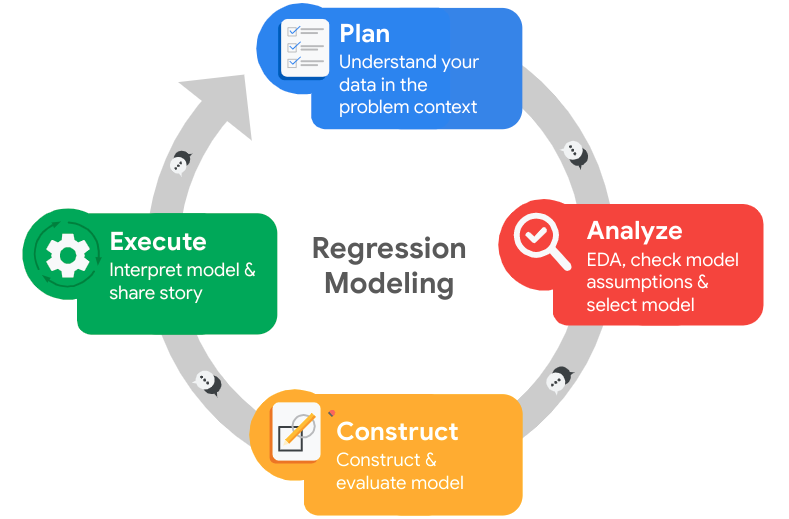

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- My major stakeholder is the senior leadership at Salifort?
- Salifort has a large turnover problem, and they are trying to identify root causes so that they can attempt to remedy the issue.
- Just over 2% of those surveyed have gotten a promotin in the last 5 years, nearly 15% of those surveyed have been involved in a workplace accident, and the median worker is working 9 hour days.
- None
- This data is pretty heavily anonymized. I might be able to identify some of the outliers for certain variables, but as a general rule, it would be hard to break anonymity. Beyond that, there might be some ethical considerations about how leadership would use this model. Might they use it to justify not promoting people? I can't think of an immediate way to do so, and to be frank, their promotion rate is low enough that I don't think it could hurt. 

Having to come back to the ethics question after investigating further. It seems having a workplace accident is negatively reduces the chance of leaving. While this is only correlational, it could give the unscrupulous the idea to skimp on work place safety.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [40]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import OLS
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, recall_score, precision_score, \
            roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident':'work_accident','promotion_last_5years':'promotion_last_5_years',
                         'Department':'department', 'average_montly_hours':'average_monthly_hours'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_monthly_hours     0
time_spend_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
len(df0.loc[df0.duplicated(),:])

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0.loc[df0.duplicated(),:].sort_values(by=['satisfaction_level','last_evaluation','average_monthly_hours']).head(20)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
12278,0.09,0.78,6,254,4,0,1,0,support,low
14489,0.09,0.78,6,254,4,0,1,0,support,low
12477,0.09,0.79,6,275,4,0,1,0,sales,low
14688,0.09,0.79,6,275,4,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

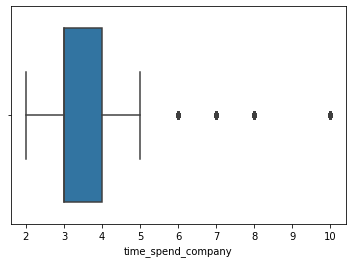

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(df1['time_spend_company'])

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1 = df1['time_spend_company'].quantile(0.25)
q3 = df1['time_spend_company'].quantile(0.75)

print(len(df1[df1['time_spend_company']>q3+1.5*(q3-q1)]))


824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- Relationships are not linear and distributions are not unimodal when filtered by whether someone left or not
- Given the non-linear relationships between data, we will likely use a tree based model. As such, we do not need normalizing transformations, and I am declining to try feature engineering until evaluating the first pass of models.
- EDA helps you understand what the data looks like, how it is distributed, and how variables are related to other variables. This can be very helpful in selecting the right variables for the construction of the model.
- None
- Given the seen relationship between the last evaluation score and whether or not someone leaves, there is potential that upper leadership could believe that a reduction in evaluation scores could reduce turnover, which could be problematic.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts()/len(df1)*100)

0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

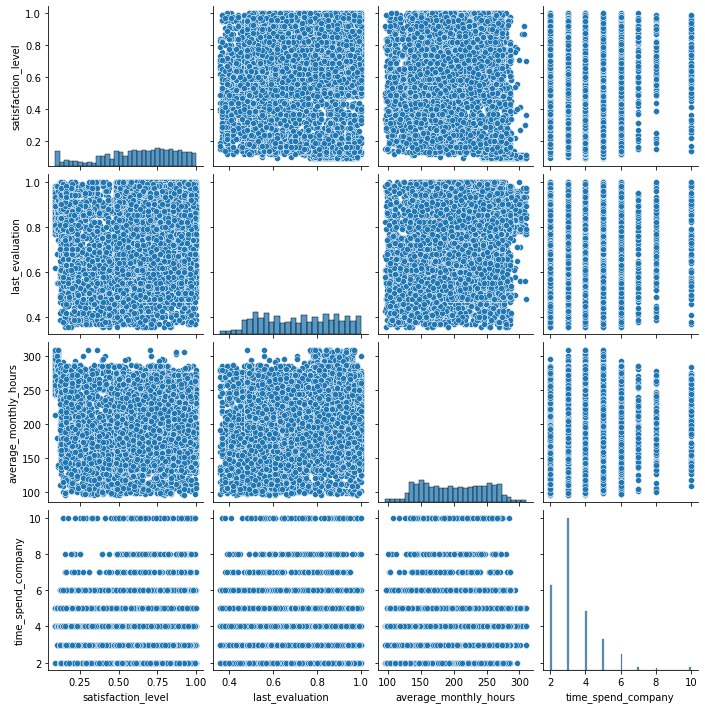

In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df1, vars=['satisfaction_level', 'last_evaluation', 'average_monthly_hours','time_spend_company'])

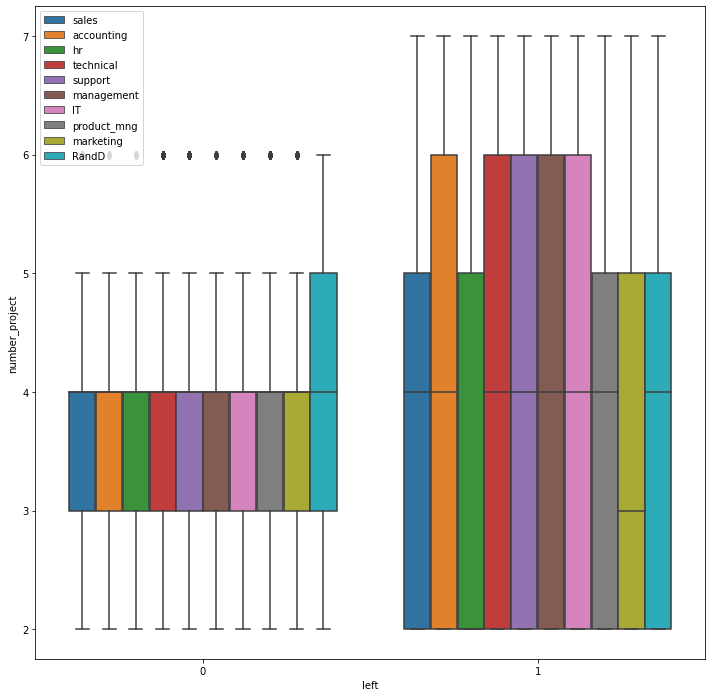

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
ax = plt.figure(figsize=(12,12))
sns.boxplot(x='left', y='number_project', hue='department', data=df1)
plt.legend(loc='upper left')
plt.show()

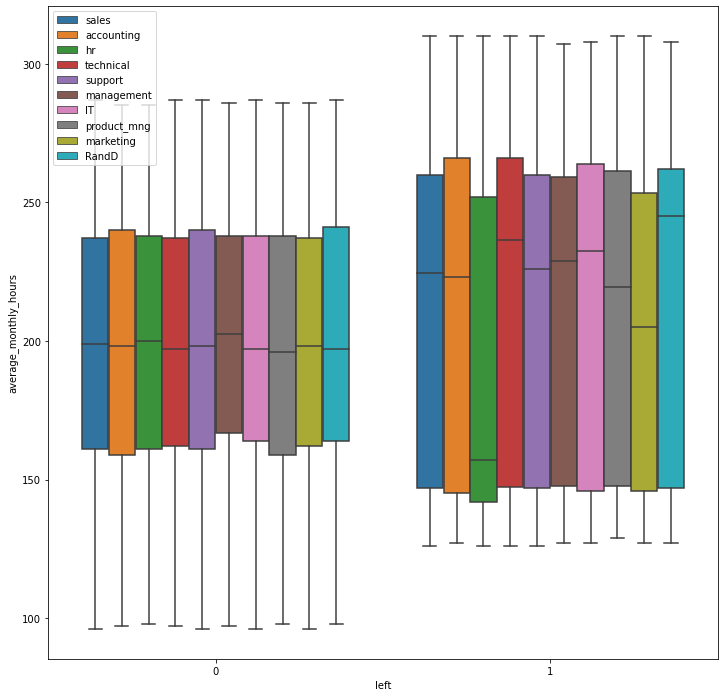

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
ax = plt.figure(figsize=(12,12))
sns.boxplot(x='left', y='average_monthly_hours', hue='department', data=df1)
plt.legend(loc='upper left')
plt.show()

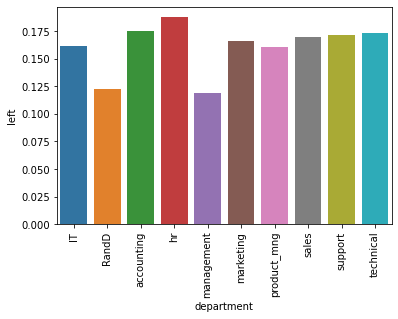

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

plot = sns.barplot(x = 'department', y='left', data=df1.groupby('department', as_index=False).agg({'left':'mean'}))
_ =plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

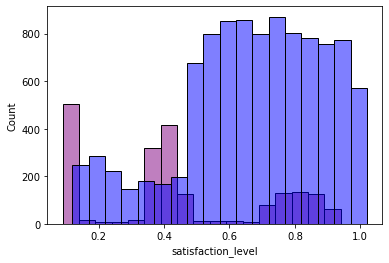

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
ax = plt.figure()
sns.histplot(df1.loc[df1['left']==1,'satisfaction_level'], color = 'purple', alpha=0.5, binwidth=0.05)
sns.histplot(df1.loc[df1['left']==0,'satisfaction_level'], color = 'blue', alpha=0.5, binwidth=0.05)

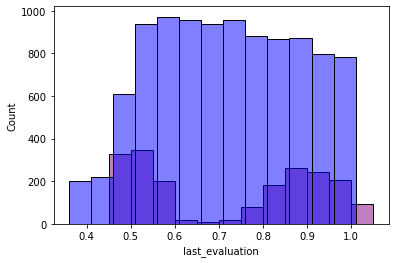

In [19]:
ax = plt.figure()
sns.histplot(df1.loc[df1['left']==1,'last_evaluation'], color = 'purple', alpha=0.5, binwidth=0.05)
sns.histplot(df1.loc[df1['left']==0,'last_evaluation'], color = 'blue', alpha=0.5, binwidth=0.05)

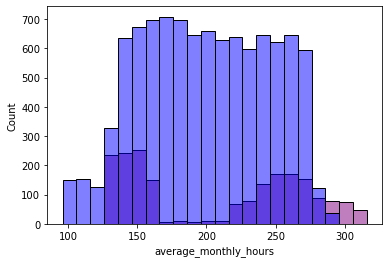

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
ax = plt.figure()
sns.histplot(df1.loc[df1['left']==1,'average_monthly_hours'], color = 'purple', alpha=0.5, binwidth=10)
sns.histplot(df1.loc[df1['left']==0,'average_monthly_hours'], color = 'blue', alpha=0.5, binwidth=10)

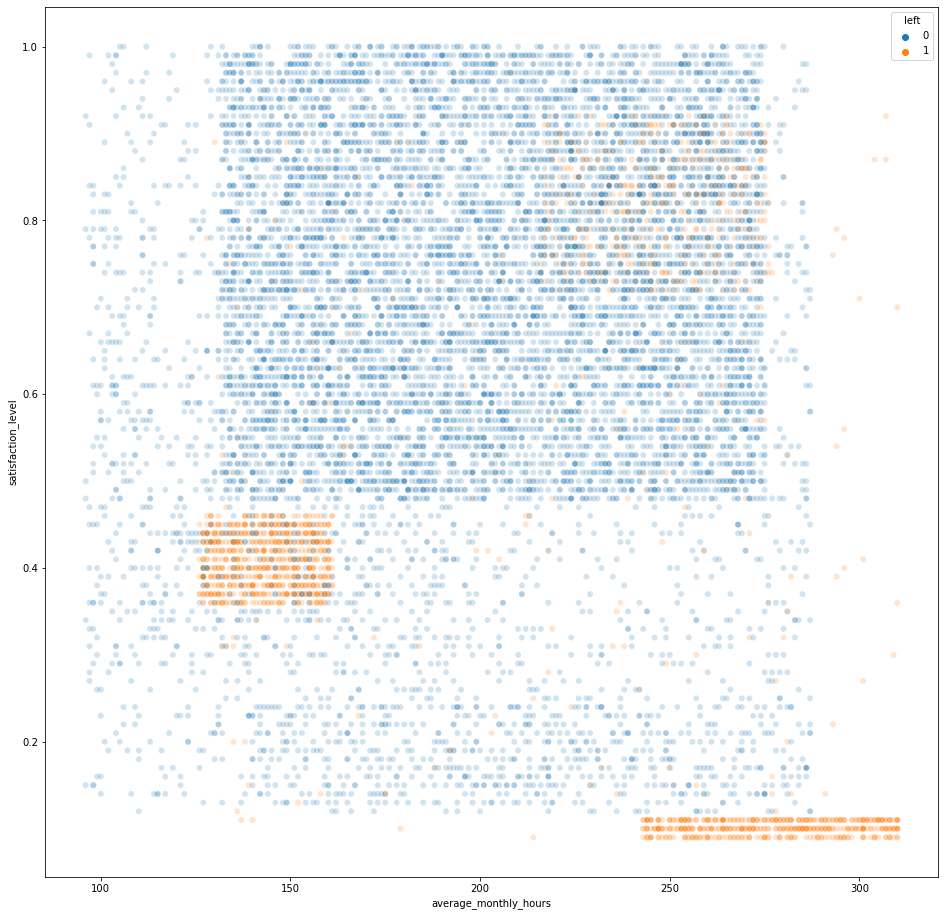

In [21]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.2)

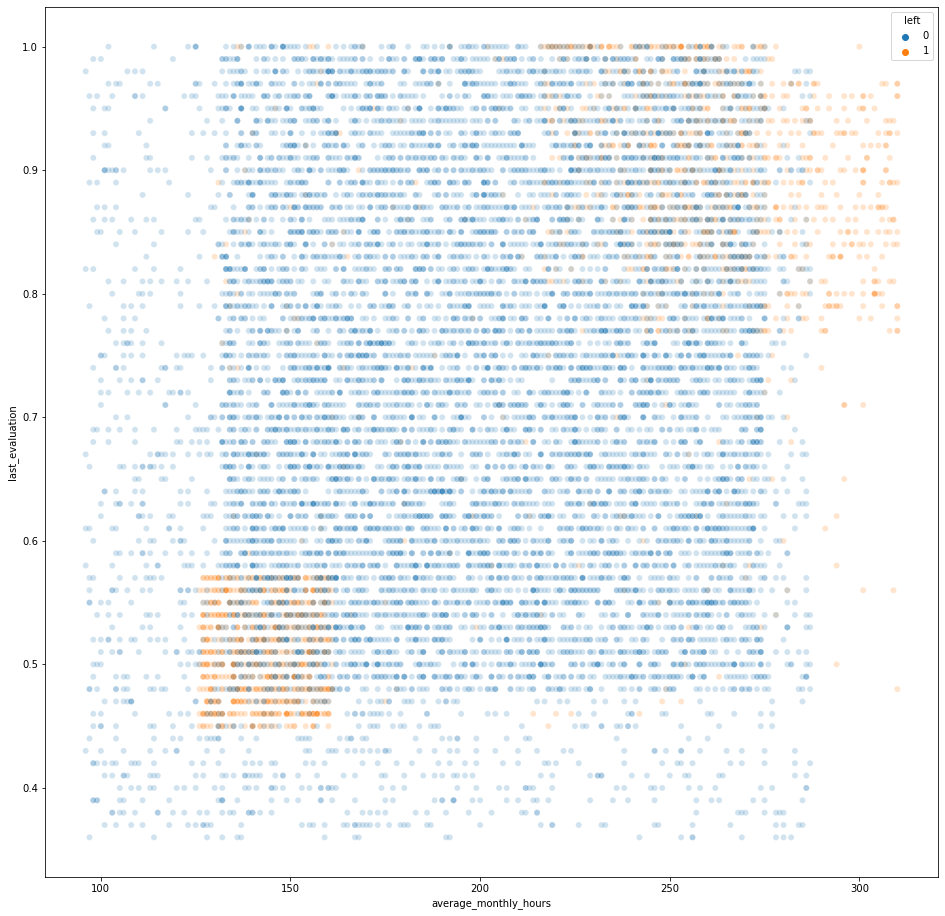

In [22]:
plt.figure(figsize=(16,16))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.2)

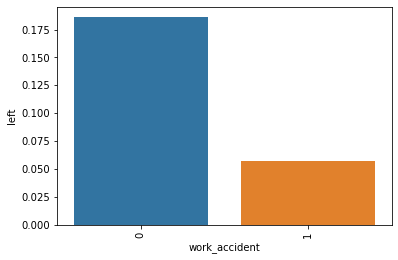

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plot = sns.barplot(x = 'work_accident', y='left', data=df1.groupby('work_accident', as_index=False).agg({'left':'mean'}))
_ =plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

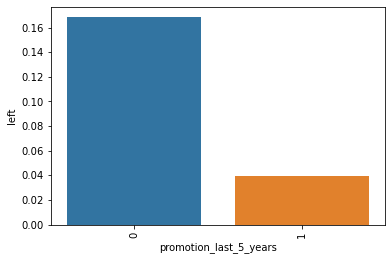

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
plot = sns.barplot(x = 'promotion_last_5_years', y='left', data=df1.groupby('promotion_last_5_years', as_index=False).agg({'left':'mean'}))
_ =plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

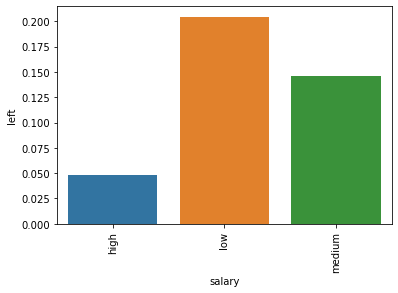

In [25]:
plot = sns.barplot(x = 'salary', y='left', data=df1.groupby('salary', as_index=False).agg({'left':'mean'}))
_ =plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### Insights

So, in something that doesn't look terribly organic, there are very clear groupings of leavers that have certain satisfaction levels, evaluation scores, and number of hours worked. Given these groups, it is very clear that we will need to use a tree based model.

Both getting a promotion or having a workplace accident seem to be strong negative predictors, the latter of which is weird. Additionally, there appears to be a clear differential in who leaves by salary.

Other variables are not as predictive, but this gives a good starting set.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- We have some non-unimodal distributions. I don't really think this is odd but I do think it is important
- I am choosing average_monthly_hours, satisfaction_level, last_evaluation, promotion_last_5_years, and work_place accident. I chose these variables because they all demonstrated strong differences in distribution between those who left and those who remained
- Yes, monstly because I used a model with very few assumptions.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a classification task.

### Identify the types of models most appropriate for this task.

Tree based models are most appropriate. There are outliers in the data (these could be removed if we desired) and non-linearites.

### Modeling

Add as many cells as you need to conduct the modeling process.

It seems that it would be poor to use a linear model here given the nonlinearity in the data. We can use either tree based models or neural networks. Given this is purely tabular data, tree based models are likely better performing. With no other information, we might assume that we should prefer gradient boosted trees over random forests, but this is likely a good chance to evaluate both models on cross validated training data.

In [26]:
# First, prepare data sets
df2 = df1.copy().drop(['department'], axis='columns')
df2 = pd.get_dummies(df2, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   left                    11991 non-null  int64  
 7   promotion_last_5_years  11991 non-null  int64  
 8   salary_low              11991 non-null  uint8  
 9   salary_medium           11991 non-null  uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 1.1 MB


In [27]:
y = df2['left']
X = df2.copy().drop(['left'], axis='columns')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [28]:
rfc = RandomForestClassifier()

parameters = {
    'n_estimators':[25,50,100],
    'max_depth':[6,8,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,5,10]
}

rfc_cv = GridSearchCV(rfc,param_grid=parameters, scoring=['f1','recall','precision','roc_auc'], refit='roc_auc',verbose=3)
rfc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25, f1=0.942, precision=0.976, recall=0.909, roc_auc=0.985, total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25, f1=0.923, precision=0.966, recall=0.884, roc_auc=0.973, total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25, f1=0.932, precision=0.966, recall=0.899, roc_auc=0.971, total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25, f1=0.942, precision=0.973, recall=0.912, roc_auc=0.986, total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=25, f1=0.950, precision=0.977, recall=0.925, roc_auc=0.983, total=   0.1s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, f1=0.948, precision=0.980, recall=0.918, roc_auc=0.985, total=   0.2s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, f1=0.930, precision=0.973, recall=0.890, roc_auc=0.978, total=   0.3s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=50, f1=0.938, precision=0.979, reca

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  2.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [29]:
print(rfc_cv.best_estimator_)
print(rfc_cv.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9825092636924146


So our random forest model gives really good results. With a default weighting scheme, every fold of the cross validation achieved greater than 96% precision, while also acheiving nearly 90% recall. This is very good if a potential use of this model was targeted intervention. Because the precision is high, that means that any resources expended are likely being well used. Next is the gradient boosted model.

In [30]:
xgb = XGBClassifier()

parameters = {
    'n_estimators':[25,100],
    'max_leaves':[8,32],
    'subsample':[1],
    'learning_rate':[0.1],
    'tree_method':['hist'],
    'n_jobs':[-1]
    
    
}

xgb_cv = GridSearchCV(xgb,param_grid=parameters, scoring=['f1','recall','precision','roc_auc'], refit='roc_auc',verbose=3)
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist, f1=0.930, precision=0.942, recall=0.918, roc_auc=0.978, total= 1.3min
[CV] learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV]  learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist, f1=0.901, precision=0.916, recall=0.887, roc_auc=0.970, total= 1.3min
[CV] learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s


[CV]  learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist, f1=0.907, precision=0.911, recall=0.903, roc_auc=0.964, total= 1.2min
[CV] learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist 
[CV]  learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist, f1=0.921, precision=0.929, recall=0.912, roc_auc=0.982, total= 1.3min
[CV] learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist 
[CV]  learning_rate=0.1, max_leaves=8, n_estimators=25, n_jobs=-1, subsample=1, tree_method=hist, f1=0.931, precision=0.931, recall=0.931, roc_auc=0.981, total= 1.2min
[CV] learning_rate=0.1, max_leaves=8, n_estimators=100, n_jobs=-1, subsample=1, tree_method=hist 
[CV]  learning_rate=0.1, max_leaves=8, n_estimators=100, n_jobs=-1, subsample=1, tree_method=hist, f1=0.953, precision=0.977, recall=0.931, roc_auc=0.989, total= 5.8min
[CV] learning_rate=0.1, max_leaves=

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 75.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [

In [31]:
print(xgb_cv.best_estimator_)
print(xgb_cv.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=32, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)
0.9867224721717338


Even with a much less exhaustive search for tuning hyperparameters, the gradient boosted model still outperforms random forest by a notable margin. It is worth noting, however, that the default weighting for the gradient boosted tree yielded slightly lower precision in exchange for higher recall. If this were probelmatic, we could solve it by weighting the classes such that missing negatives actually counted more. However, with such high scores, this is not likely to be a problem.

In fact, our scores are so high that it would normally raise suspicions of some sort of data leakage. However, in this case, the data appears to be very artificial, with distributions with well defined edges that tree based models are very good at finding. As such, we won't investage for data leakage further.

Now, let's evaluate our model against our test data to see how well it performs

In [32]:
clf = xgb_cv.best_estimator_
y_preds = clf.predict(X_test)

print('f1 score: ', f1_score(y_test, y_preds))
print('precision: ', precision_score(y_test, y_preds))
print('recall: ', recall_score(y_test, y_preds))
print('ROC AUC: ', roc_auc_score(y_test, y_preds))

f1 score:  0.9523809523809523
precision:  0.9762532981530343
recall:  0.9296482412060302
ROC AUC:  0.9625752450407963


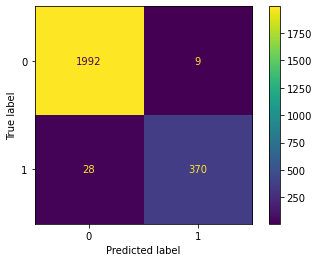

In [41]:

cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot(values_format='')

And as a final thing, let's see what was considered most important in determining who would leave.

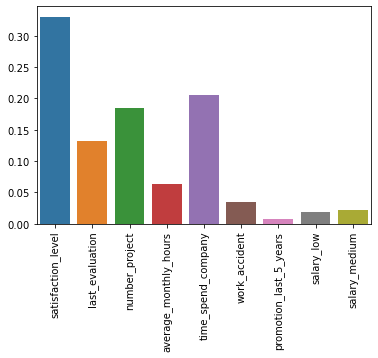

In [33]:
plot = sns.barplot(clf.feature_names_in_, clf.feature_importances_)
_ =plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



- We could consistenly predict who would leave, with self reported satisfaction level standing out as the most important factor.
- I would recommend that we focus our retention efforts on people who this model predicts will leave. In particular, I would focus on examining how raising low satisfaction scores, targeting retention towards employees with high evaluations, and targeting an hours worked range of 160-200 per month. I specifically said to examine these things further because while they appear to be important to our model, our data was not controlled data from an experiment, and assuming causation would be problematic.
- I believe the model could be improved. Specifically, the gradient boosted model that was used was not highly tuned due to resource constraints. It could likely see mild improvements just from more thorough hyperparameter tuning. Additionally, there was very little feature engineering here. While a tree based model would likely discover most potential multivariate relationships, we could potentially engineer ones to create a more robust model. Finally if we were most interested in interpretability, we could like pare the promotion and salary variables.
- Probably a lot, but it would be better for the team to ask or for me to ask the team what their questions are than for me to guess their questions for them.
- None
- None that have not already been stated.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

The model performs well, with a precision of 97.6% and a recall of 92.9% on unseen test data. This precision was in line with the precision of the cross validated training data, and the recall was higher than seen with training. The numbers indicate that the model performs very well. Additionally, with a high ROC_AUC, it is likely that we could operationally tune the model towards higher precision or recall (depeding on business priorities) and still acheive good results.

Additionally, we are able to determine some of the important factors affecting the outcome. The most important factor is the self-reported satisfaction level. Other important factors include last evaulation score, average monthly hours worked, salary, and whether or not there was a work accident. While these are important factors and there are plausible explanations of why those factors would influence retention, we should not make assumptions about causitive effects. Some of the exploratory data analysis done here has shown both counterintuitive effects (smaller fraction of people with a work accident left) and non-unimodal relationships (the rate of people leaving peaks at both high and low monthly hours).

### Conclusion, Recommendations, Next Steps

I conclude that we will be able to predict the people most likely to leave the company with high confidence. I recommend that we do so, and target retention efforts towards those people. Simultaneously, we should take three next steps:
1) We should build on the work done here to further investigate the causes of employees leaving in a rigorous way.
2) We should continue surveying employees on a regular basis. Additionally, we should note whether not employees predicted to leave were targeted with some sort of intervention
3) We should use the data from 2 to assess the effectiveness of our intervention strategy, and the data from 1 to inform changes and improvements to the intervention strategy.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.